# Analyse de la droiture de la formation de robots

Pour évaluer la droiture d'une formation de ligne de robots, on utilise une approche similaire à celle de la **régression linéaire**. L'idée est de calculer une ligne de régression qui s'ajuste le mieux à la position des robots, puis d'évaluer à quel point chaque robot se trouve proche de cette ligne. la meusure utilisée pour cela est **l'erreur quadratique moyenne (Mean Squared Error, MSE)** entre les positions des robots et la ligne de régression. 

In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from pathlib import Path
from PIL import Image
import datetime


In [120]:
# load data

robot_data_position = pd.read_csv('robot_positions.csv')
# les valeurs unique de la colonne 'experience'
robot_data_position = {exp : robot_data_position.loc[robot_data_position['experience'] == exp].values[:,1:] for exp in robot_data_position['experience'].unique()}


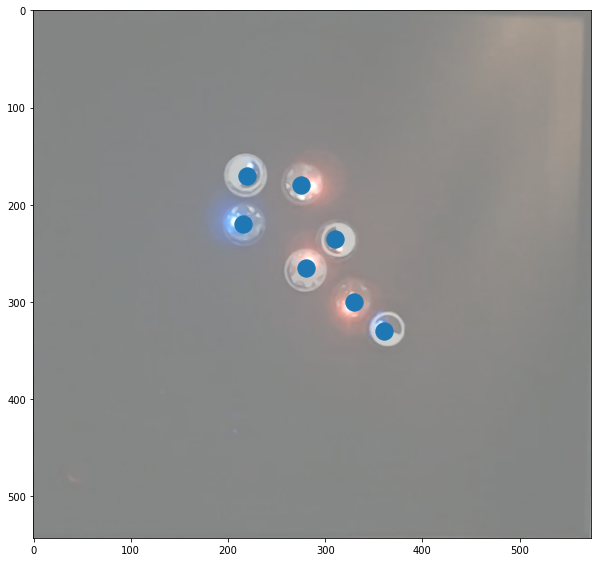

In [117]:
picture_path = Path.cwd() / 'pictures'
plot_path = Path.cwd() / 'plots'
robot_position = robot_data_position['exp4']

img_list = list(picture_path.glob('*.png'))
img = Image.open(img_list[3])
img_array = np.array(img)
plt.figure(figsize=(10,10))
plt.imshow(img_array,alpha=0.5)
plt.scatter([x[0] for x in robot_position],[x[1] for x in robot_position],s=300)
arena_size = img_array.shape
plt.show()

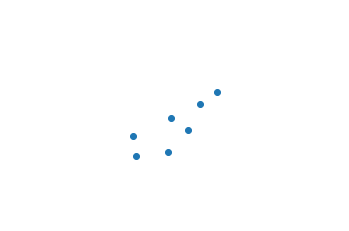

In [118]:
robot_position = robot_position.T
plt.plot(robot_position[0], robot_position[1], 'o')
plt.xlim(0, arena_size[1])
plt.ylim(0, arena_size[0])
plt.axis('off')
plt.show()

coeficient de régression:  0.8997146351406439
MSE:  1001.3569390251004


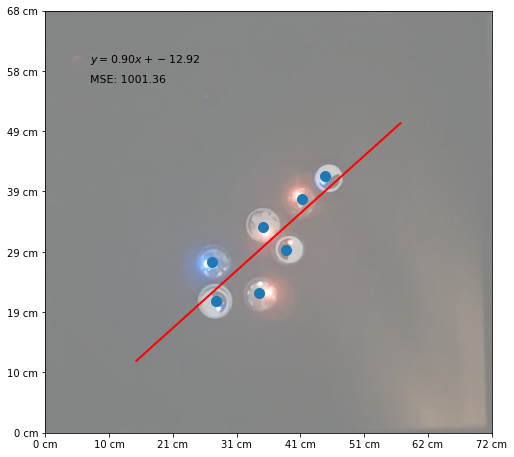

In [119]:
#  regression
reg = linear_model.LinearRegression()
reg.fit(robot_position[0].reshape(-1, 1), robot_position[1].reshape(-1, 1))
print("coeficient de régression: ", *reg.coef_[0])
line = reg.predict(robot_position[0].reshape(-1, 1))
# print(line)
#  MSE
mse = sk.metrics.mean_squared_error(robot_position[1], line)
print("MSE: ", mse)
# arena_dim = np.array([54, 72])
arena_dim = np.array([68, 72])

def custom_ticksx(x, pos):
    #  on fait une interpolation linéaire pour avoir les valeurs en cm
    learp = np.interp(x, [0, arena_size[1]], [0, arena_dim[1]])
    return f"{learp:.0f} cm"

def custom_ticksy(x, pos):
    #  on fait une interpolation linéaire pour avoir les valeurs en cm
    learp = np.interp(x, [0, arena_size[0]], [0, arena_dim[0]])
    return f"{learp:.0f} cm"

fig, ax = plt.subplots(figsize=(8, 10))
ax.imshow(img_array,alpha=0.5)
ax.plot(robot_position[0], robot_position[1], 'o', markersize=10)
ax.plot(np.linspace(0,arena_size[1],50)[10:-10], reg.predict(np.linspace(0,arena_size[1],50)[10:-10].reshape(-1, 1)), color='red', linewidth=2)
ax.set_xlim(0, arena_size[1])
ax.set_ylim(0, arena_size[0])
ax.set_xticks(np.linspace(0, arena_size[1], 8))
ax.set_yticks(np.linspace(0, arena_size[0], 8))
ax.xaxis.set_major_formatter(custom_ticksx)
ax.yaxis.set_major_formatter(custom_ticksy)
ax.text(0.1, 0.9, f"$y = {reg.coef_[0][0]:.2f}x + {reg.intercept_[0]:.2f}$", transform=ax.transAxes, fontsize=11, verticalalignment='top', horizontalalignment='left')
ax.text(0.1, 0.85, f"MSE: {mse:.2f}", transform=ax.transAxes, fontsize=11, verticalalignment='top', horizontalalignment='left')
plt.savefig(plot_path / f'regression{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()